In [16]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sys
sys.path.append('../bin')
# convenience functions
from util import WTK_idx, NSRDB_idx, datetimeIndex

In [19]:
# open the wind data "file"
wtk = h5pyd.File("/nrel/wtk-us.h5", 'r')  

In [20]:
list(wtk)  # list the datasets in the file

['inversemoninobukhovlength_2m',
 'status',
 'windspeed_10m',
 'temperature_80m',
 'temperature_160m',
 'temperature_200m',
 'pressure_200m',
 'DIF',
 'temperature_10m',
 'winddirection_120m',
 'windspeed_120m',
 'windspeed_140m',
 'temperature_60m',
 'relativehumidity_2m',
 'windspeed_200m',
 'temperature_140m',
 'precipitationrate_0m',
 'winddirection_160m',
 'pressure_0m',
 'GHI',
 'windspeed_80m',
 'winddirection_100m',
 'temperature_2m',
 'temperature_40m',
 'coordinates',
 'winddirection_60m',
 'windspeed_160m',
 'winddirection_40m',
 'winddirection_10m',
 'DNI',
 'winddirection_200m',
 'windspeed_60m',
 'datetime',
 'pressure_100m',
 'windspeed_40m',
 'temperature_120m',
 'windspeed_100m',
 'winddirection_140m',
 'temperature_100m',
 'winddirection_80m']

In [21]:
dataset = wtk['windspeed_60m']

In [22]:
data1 = dset[1795,::8,::8]

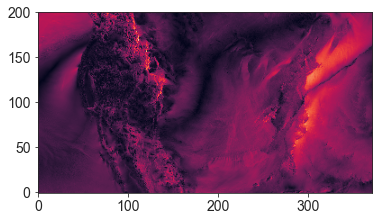

In [23]:
plt.imshow(data1, origin="lower")

In [24]:
data2 = dset[2199,1100:1400,2000:2400]

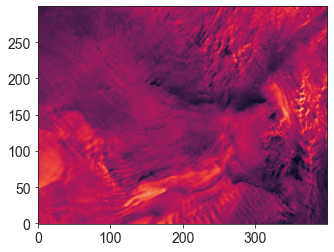

In [25]:
plt.imshow(data2, origin="lower")

Example Data Export for Colorado

In [26]:
def indicesForBBox(wtk, lat_range, lon_range):
    xmin = None
    xmax = None
    ymin = None
    ymax = None
    for i in [0,1]:
        for j in [0,1]:
            yx = WTK_idx(wtk, (lat_range[i], lon_range[j]))
            if xmin is None or yx[1] < xmin:
                xmin = yx[1]
            if xmax is None or yx[1] > xmax:
                xmax = yx[1]
            if ymin is None or yx[0] < ymin:
                ymin = yx[0]
            if ymax is None or yx[0] > ymax:
                ymax = yx[0]
    return ([xmin, xmax], [ymin, ymax])

# This bounding box is the state of Colorado, more or less
(x_range,y_range) = indicesForBBox(wtk, [36.96744946416934, 41.02964338716638],
                                   [-109.05029296875, -102.0849609375])

In [27]:
# get every other windspeed measurement within this box for a given time step
dtdf = datetimeIndex(wtk)
dset = wtk['windspeed_100m']
timestep = dtdf.loc[dtdf.datetime == '2012-04-01 12:00:00'].index[0]
data = dset[timestep, y_range[0]:y_range[1]:2, x_range[0]:x_range[1]] 

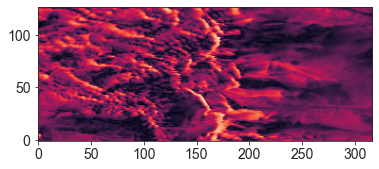

In [28]:
plt.imshow(data, origin="lower")

In [32]:
spacing = 8 # every 8th point is 16km resolution
cube = dset[::(24 * 30), y_range[0]:y_range[1]:spacing, x_range[0]:x_range[1]:spacing] # every 30 days
ll_for_coords = wtk['coordinates'][y_range[0]:y_range[1]:spacing, x_range[0]:x_range[1]:spacing]
df = pd.DataFrame()
for i in range(len(ll_for_coords)):
    for j in range(len(ll_for_coords[i])):
        colname = "%.03f,%.03f" % (ll_for_coords[i][j][1], ll_for_coords[i][j][0])
        df[colname] = cube[:, i, j]

df.index = wtk["datetime"][::(24 * 30)]
df.index.name = 'datetime'
        
df.head()

,"-108.918,36.314","-108.738,36.337","-108.558,36.360","-108.377,36.383","-108.196,36.406","-108.016,36.428","-107.835,36.450","-107.654,36.471","-107.472,36.492","-107.291,36.513",...,"-104.031,41.443","-103.834,41.458","-103.637,41.472","-103.439,41.486","-103.242,41.500","-103.044,41.513","-102.846,41.526","-102.648,41.538","-102.450,41.551","-102.252,41.562"
datetime,,,,,,,,,,,,,,,,,,,,,
b'20070101000000',1.232948,1.629692,1.474045,2.407913,1.113922,1.477097,1.120026,1.962341,1.522873,1.815849,...,5.334633,5.923645,6.982635,8.450577,8.066040,7.095551,7.397690,7.837151,8.795433,9.939880
b'20070131000000',4.055908,1.318398,0.811790,7.196266,9.112823,8.435318,8.874786,8.508560,4.971466,8.020264,...,9.378342,9.118927,9.991760,10.074158,10.666222,8.908356,5.746635,5.627617,7.068085,7.889038
b'20070302000000',9.503464,7.907349,9.765923,8.896149,10.589920,11.215553,11.651970,11.789299,13.245033,14.325386,...,14.334541,14.014099,14.267403,13.580734,15.317238,13.931702,17.725151,12.323372,4.898224,6.878876
b'20070401000000',9.631645,5.987732,6.930756,7.416000,8.182014,8.984650,9.555344,11.316261,11.999878,11.658073,...,11.181984,9.933777,10.150459,9.353920,9.222694,11.053802,11.615341,11.389511,11.590927,13.138222
b'20070501000000',6.634727,7.165749,7.733391,7.300026,6.323433,4.367195,4.599136,5.560471,6.070129,4.953156,...,5.648979,5.734428,8.044678,8.673363,8.844261,9.183022,9.054840,10.046692,10.013123,10.696739


In [33]:
df.to_csv("colorado_wtk-wspd.csv")

In [34]:
wtk.close()